<a href="https://colab.research.google.com/github/genkihoshino02/NoticeBoard-php/blob/master/chem_obs.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [20]:
!pip install dgllife networkx dgl-cu110 rdkit-pypi torch

In [21]:
import dgl
import numpy as np
import networkx as nx
from dgllife.utils import smiles_to_complete_graph
import torch
from rdkit import Chem
from dgllife.utils import smiles_to_bigraph, CanonicalAtomFeaturizer, CanonicalBondFeaturizer
from functools import partial
import pandas as pd
import random

device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")
df=pd.read_csv("/content/drive/MyDrive/Research/Python/Codes/code-Jun 24/data/data.csv")
# Node featurizer
featurize_atoms = CanonicalAtomFeaturizer(atom_data_field='h')
# Edge featurizer
featurize_bonds = CanonicalBondFeaturizer(bond_data_field='h')

add_self_loop = True

dataset=[]

for i in range(len(df)):    
    smiles=df['構造 (CD)'][i]
    
    graph= smiles_to_bigraph(
       df['構造 (CD)'][i], node_featurizer=featurize_atoms,edge_featurizer=featurize_bonds
       )
    if graph==None:
        graph= smiles_to_bigraph(
           df["入力構造"][i], node_featurizer=featurize_atoms,edge_featurizer=featurize_bonds
           )
    if graph!=None:
        smiles=df['構造 (CD)'][i]
    else:
        smiles=df["入力構造"][i]
    
    label=torch.tensor([df["変化物"][i]], dtype=torch.long).to(device)
    if graph!=None and smiles!=None:
        pair=(smiles,graph.to(device),label)
        dataset.append(pair)
        
        
        
dataset_label_one=[]
dataset_label_zero=[]
for d in dataset:
    if d[2]==1:
        dataset_label_one.append(d)
    elif d[2]==0:
        dataset_label_zero.append(d)
print("[1]",len(dataset_label_one))
print("[0]",len(dataset_label_zero))
dataset=dataset+dataset_label_one*4+dataset_label_zero*1

random.seed(10070)
random.shuffle(dataset)

dataset=tuple(dataset)

Invalid mol found
Invalid mol found
Invalid mol found
Invalid mol found
Invalid mol found
Invalid mol found
Invalid mol found
Invalid mol found
Invalid mol found
Invalid mol found
Invalid mol found
Invalid mol found
Invalid mol found
Invalid mol found
Invalid mol found
Invalid mol found
Invalid mol found
Invalid mol found
Invalid mol found
Invalid mol found
Invalid mol found
Invalid mol found
Invalid mol found
Invalid mol found
Invalid mol found
Invalid mol found
Invalid mol found
Invalid mol found
Invalid mol found
Invalid mol found
Invalid mol found
Invalid mol found
Invalid mol found
Invalid mol found
Invalid mol found
Invalid mol found
Invalid mol found
Invalid mol found
Invalid mol found
Invalid mol found
Invalid mol found
Invalid mol found
Invalid mol found
Invalid mol found
Invalid mol found
Invalid mol found
Invalid mol found
Invalid mol found
Invalid mol found
Invalid mol found
Invalid mol found
Invalid mol found
Invalid mol found
Invalid mol found
Invalid mol found
Invalid mo

[1] 4705
[0] 4628
CC1=NC2=C(C=C1)C=C(S(=O)(O)=O)C=C2N(C3=O)C(C4=C3C(Cl)=C(Cl)C(Cl)=C4Cl)=O Graph(num_nodes=30, num_edges=66,
      ndata_schemes={'h': Scheme(shape=(74,), dtype=torch.float32)}
      edata_schemes={'h': Scheme(shape=(12,), dtype=torch.float32)}) tensor([1], device='cuda:0')
---------visualization of molecular--------------


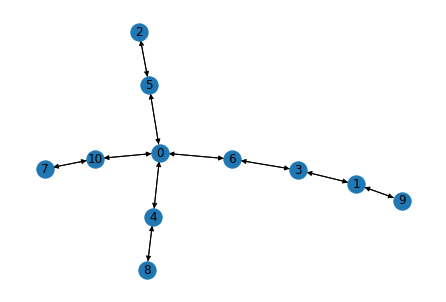

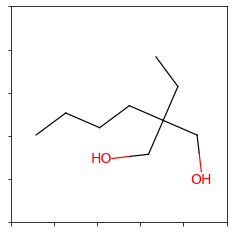

In [22]:
cnt_1=0
cnt_0=0
for i in range(len(dataset)):
    if dataset[i][2]==1:
        cnt_1+=1
    elif dataset[i][2]==0:
        cnt_0+=1

print("[1]",cnt_1)
print("[0]",cnt_0)

s,g,l=dataset[10][0],dataset[10][1],dataset[10][2]
print(s,g,l)

def visualize(s,g):
    import networkx as nx
    import dgl
    import matplotlib.pyplot as plt
    print("---------visualization of molecular--------------")
    nx.draw(dgl.to_networkx(g.cpu()),with_labels=True)
    #Molecular structure
    from rdkit import Chem
    from rdkit.Chem import Draw
    size = (120, 120)

    fig = Draw.MolToMPL(Chem.MolFromSmiles(s), size=size)
visualize(dataset[15][0],dataset[15][1])

define functions

In [78]:
s=[]
g=[]
l=[]
for d in dataset:
  if d[0]!=None:
    s.append(d[0])
    g.append(d[1])
    l.append(d[2])
    
fragments_dict={
    "amide":Fragments.fr_amide,
    "ester":Fragments.fr_ester,
    "carboxylic acids":Fragments.fr_COO,
    "aldehydes":Fragments.fr_aldehyde
}

from rdkit.Chem import Fragments
def examine_num_frag(fr_x):
  def inner():
    max_n=0
    for i in range(len(s)):
      m=Chem.MolFromSmiles(s[i])
      if m!=None and fr_x(m)>=max_n:
        max_n=fr_x(m)

    frag_n=[0]*(max_n+1)
    none_data=0
  
    for i in range(len(s)):
      eter_num_each=0
      m=Chem.MolFromSmiles(s[i])
      if m!=None:
        frag_n[fr_x(m)]+=1
      else:
        none_data+=1
    return frag_n
  return inner

def graph_visualize_fragment(frag_list):
  fig = plt.figure()
  ax = fig.add_subplot(1,1,1)

  n = list(np.arange(0,len(frag_list)))
  ax.bar(n,frag_list,color="r")

  plt.show()


aromatic ring

In [83]:
def isRingAromatic(mol, bondRing):
  for id in bondRing:
      if not mol.GetBondWithIdx(id).GetIsAromatic():
          return False
  return True

aromatic_n=[0]*22
none_ring=0
for i in s:
  n_rings=0
  m=Chem.MolFromSmiles(i)
  if m!=None:
    ri=m.GetRingInfo()
    for k in range(len(ri.BondRings())):
      if isRingAromatic(m,ri.BondRings()[k]):
        n_rings+=1
  else:
    none_ring+=1
  if none_ring!=1:
    aromatic_n[n_rings]+=1

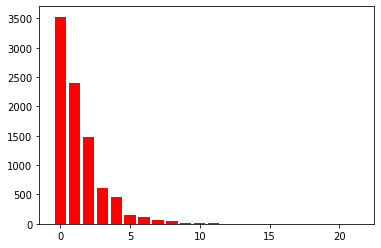

In [84]:
fig = plt.figure()
ax = fig.add_subplot(1,1,1)

ring_n = list(np.arange(0,22))
ax.bar(ring_n,aromatic_n,color="r")

plt.show()

In [ ]:
import dgl.function as fn
import torch
import torch.nn as nn
import dgl
import torch.nn.functional as F
def collate(samples):
    # The input `samples` is a list of pairs
    #  (graph, label).
    smiles,graphs, labels = map(list, zip(*samples))
    batched_graph = dgl.batch(graphs)
    return batched_graph, torch.tensor(labels)

# Sends a message of node feature h.
msg = fn.copy_src(src='h', out='m')

def reduce(nodes):
    """Take an average over all neighbor node features hu and use it to
    overwrite the original node feature."""
    accum = torch.mean(nodes.mailbox['m'], 1)
    return {'h': accum}

class NodeApplyModule(nn.Module):
    """Update the node feature hv with ReLU(Whv+b)."""
    def __init__(self, in_feats, out_feats, activation):
        super(NodeApplyModule, self).__init__()
        self.linear = nn.Linear(in_feats, out_feats)
        self.activation = activation

    def forward(self, node):
        h = self.linear(node.data['h'])
        h = self.activation(h)
        return {'h' : h}

class GCN(nn.Module):
    def __init__(self, in_feats, out_feats, activation):
        super(GCN, self).__init__()
        self.apply_mod = NodeApplyModule(in_feats, out_feats, activation)

    def forward(self, g, feature):
        # Initialize the node features with h.
        g.ndata['h'] = feature
        g.update_all(msg, reduce)
        g.apply_nodes(func=self.apply_mod)
        return g.ndata.pop('h')
    
class Classifier(nn.Module):
    def __init__(self, in_dim, hidden_dim, n_classes):
        super(Classifier, self).__init__()
        self.layers = nn.ModuleList([
            GCN(in_dim, hidden_dim, F.relu),
            GCN(hidden_dim, hidden_dim, F.relu),
            GCN(hidden_dim, hidden_dim, F.relu)])
        self.classify = nn.Linear(hidden_dim, n_classes)
        
    def forward(self, g):
        # For undirected graphs, in_degree is the same as
        # out_degree.
        h = g.in_degrees().view(-1, 1).float()
        for conv in self.layers:
            h = conv(g, h)
        g.ndata['h'] = h
        hg = dgl.mean_nodes(g, 'h')
        return self.classify(hg)
    
    
from torch.utils.data import DataLoader
# Create training and test sets.
trainset = dataset[:6533]
validset=dataset[6533:7460]
testset=dataset[7460:]
data_loader_train = DataLoader(trainset, batch_size=32, shuffle=True,
                         collate_fn=collate)
data_loader_valid = DataLoader(validset, batch_size=32, shuffle=True,
                         collate_fn=collate)
data_loader_test = DataLoader(testset, batch_size=32, shuffle=True,
                         collate_fn=collate)
smiles,test_X, test_Y = map(list, zip(*testset))

import torch.optim as optim
model = Classifier(1, 512, 2).to(device)
loss_func = nn.CrossEntropyLoss()
optimizer = optim.Adam(model.parameters(), lr=0.001)
print(model)

Classifier(
  (layers): ModuleList(
    (0): GCN(
      (apply_mod): NodeApplyModule(
        (linear): Linear(in_features=1, out_features=512, bias=True)
      )
    )
    (1): GCN(
      (apply_mod): NodeApplyModule(
        (linear): Linear(in_features=512, out_features=512, bias=True)
      )
    )
    (2): GCN(
      (apply_mod): NodeApplyModule(
        (linear): Linear(in_features=512, out_features=512, bias=True)
      )
    )
  )
  (classify): Linear(in_features=512, out_features=2, bias=True)
)


In [ ]:
min_valid_loss = np.inf
train_losses = list()
train_accuracy=list()
valid_losses=list()
valid_accuracy=list()
epoch_n=100

correct_train=0
total_train=0

for epoch in range(epoch_n):
    train_loss = 0.0
    epoch_steps=0
    model.train()
    for iter, (bg, label) in enumerate(data_loader_train):
        optimizer.zero_grad()
        prediction = model(bg.to(device))
        loss = loss_func(prediction, label.to(device))
        loss.backward()
        optimizer.step()
        train_loss += loss.detach().item()
        epoch_steps+=1
        
        _, predicted = torch.max(prediction.data, 1)
        correct_train += (predicted.to(device) == label.to(device)).sum().item() 
        total_train+=label.size(0)
    
    
    valid_loss=0
    val_steps = 0
    total=0
    correct=0
    model.eval()
    for iter,(bg,label) in enumerate(data_loader_valid):
        with torch.no_grad():
            target=model(bg.to(device))
            _, predicted = torch.max(target.data, 1)
            total += label.to(device).size(0)
            correct += (predicted.to(device) == label.to(device)).sum().item() 
                
                
                
            loss=loss_func(target.to(device),label.to(device))
            valid_loss+=loss.detach().item()
            val_steps+=1
                     
                
                
    print(f"Epoch{epoch+1} -Loss:{train_loss/len(data_loader_train)} -Acc:{correct_train/total_train} -Val Loss:{valid_loss/len(data_loader_valid)} -Val Acc:{correct/total} ")
    train_losses.append(train_loss/len(data_loader_train))
    train_accuracy.append(correct_train/total_train)
    valid_losses.append(valid_loss/len(data_loader_valid))
    valid_accuracy.append(correct/total)
    if min_valid_loss>valid_loss:
        print(f'Validation Loss Decreased()')
        print(f'Validation Loss Decreased({min_valid_loss:.6f}--->{valid_loss:.6f}) \t Saving The Model')
        min_valid_loss = valid_loss
            # Saving State Dict
        torch.save(model.state_dict(), 'saved_model.pth')
    
        print("-----------------------------------------------------------------------------------------------------------------------")
    

KeyboardInterrupt: ignored

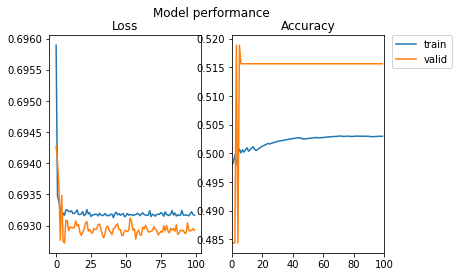

In [ ]:

import matplotlib.pyplot as plt
%matplotlib inline
fig, (ax1, ax2) = plt.subplots(1, 2)
fig.suptitle('Model performance')
plt.xlim([0,epoch_n])
ax1.plot(train_losses,label="train")
ax1.plot(valid_losses,label="valid")
ax1.set_title("Loss")
ax2.plot(train_accuracy,label="train")
ax2.plot(valid_accuracy,label="valid")
ax2.set_title("Accuracy")
# plt.plot(test_losses,label="test")
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left', borderaxespad=0.)
plt.show()